## Observations and Insights 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].value_counts()
mouse_count


g989    13
a262    10
k894    10
o795    10
c302    10
        ..
t573     1
b447     1
n482     1
o848     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice_ID = mouse_study[mouse_study.duplicated(['Mouse ID'])]
all_mice_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [13]:
# Checking the number of mice in the clean DataFrame.
mouse_ID_count = clean_df["Mouse ID"].value_counts()
mouse_ID_count

a262    1
v295    1
b128    1
v989    1
j119    1
       ..
u153    1
f932    1
l725    1
c139    1
i635    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


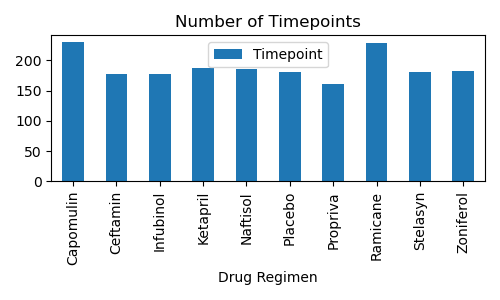

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data_df = pd.DataFrame(mouse_study.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data_df[["Drug Regimen", "Timepoint"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(5,3))
plt.title("Number of Timepoints")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


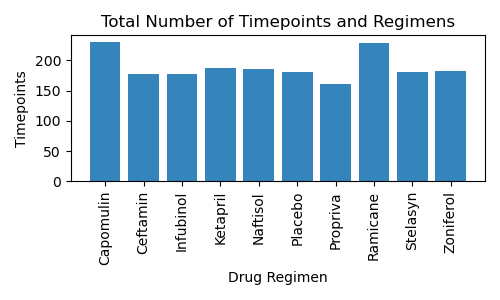

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list = summary_df.index.tolist()
drug_list
drug_count = (mouse_study.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
drug_count
x_axis = np.arange(len(drug_count))
x_axis = drug_list
plt.figure(figsize=(5,3))
plt.bar(x_axis, drug_count, alpha=.9, align="center")
plt.xticks(rotation='vertical')
plt.title("Total Number of Timepoints and Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.tight_layout()




<IPython.core.display.Javascript object>


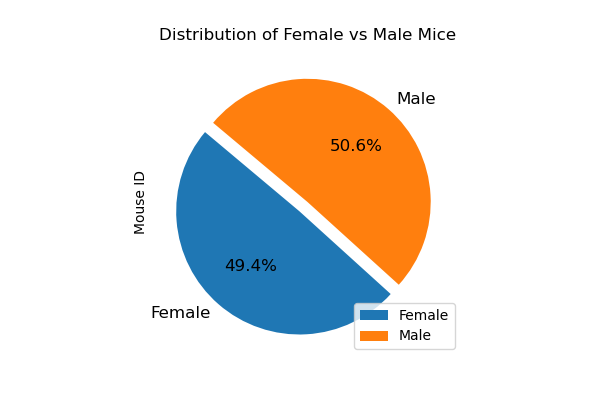

<function matplotlib.pyplot.show(block=None)>

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = pd.DataFrame(mouse_study.groupby(["Sex"]).count()).reset_index()

plt.figure(figsize=(6,4))
ax1 = plt.subplot(111, aspect="equal")
gender.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', startangle=140, labels=gender_df["Sex"], 
               legend = True, fontsize=12, explode = (0.1, 0))

plt.title("Distribution of Female vs Male Mice")
plt.legend(loc="lower right")
plt.show

<IPython.core.display.Javascript object>


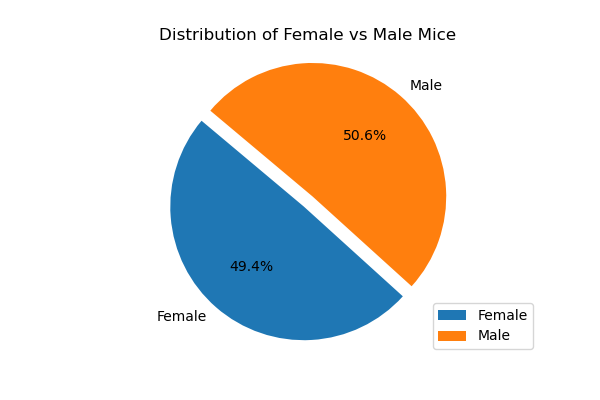

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = (mouse_study.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender
plt.figure(figsize=(6,4))
plt.pie(gender, autopct="%1.1f%%", startangle=140, labels=('Female', 'Male'), explode=(0.1, 0))
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.legend(loc="lower right")


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimen = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug = mouse_study.loc[mouse_study['Drug Regimen'].isin(regimen)]

tumor_volume_A = drug.groupby(drug['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_A.columns = ['Timepoint']


tumor_volume_A = tumor_volume_A.reset_index()
tumor_volume_B = pd.merge(tumor_volume_A, mouse_study, how="outer", on=["Mouse ID", "Timepoint"])
tumor_volume_B


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [107]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimen:
    tumor_volumes_A = tumor_volume_B['Tumor Volume (mm3)'].loc[tumor_volume_B['Drug Regimen'] == drug]    
    
    # add subset 
    tumor_vol_data.append(tumor_vol_by_drug)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes_A.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')    

For Capomulin, Interquartile Range (IQR) is 7.314067135000002
For Capomulin, values below 26.714832162499995 could be outliers
For Capomulin, values above 55.9711007025 could be outliers

For Ramicane, Interquartile Range (IQR) is 8.325365415000007
For Ramicane, values below 24.18658646249998 could be outliers
For Ramicane, values above 57.48804812250001 could be outliers

For Infubinol, Interquartile Range (IQR) is 10.002090667500006
For Infubinol, values below 32.309217298749985 could be outliers
For Infubinol, values above 72.31757996875001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 9.5930104575
For Ceftamin, values below 32.818911426250004 could be outliers
For Ceftamin, values above 71.19095325625 could be outliers



<IPython.core.display.Javascript object>


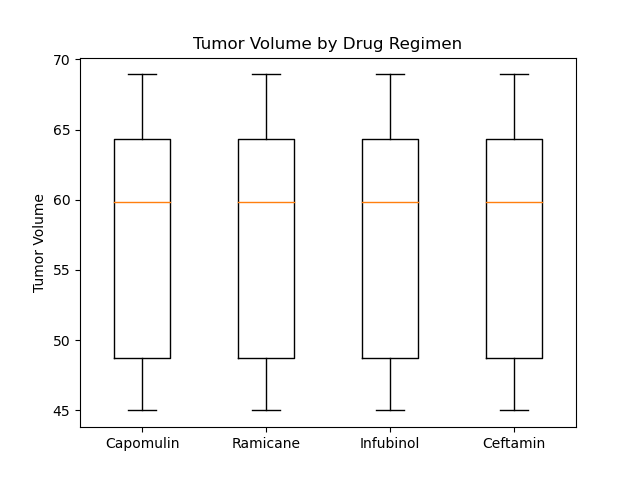

<ipython-input-120-73e4d8e8dab4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(regimen)


In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor='r', marker='o')
fig, ax = plt.subplots()
ax.set_title('Tumor Volume by Drug Regimen')
ax.set_xticklabels(regimen)
ax.set_ylabel('Tumor Volume')
ax.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


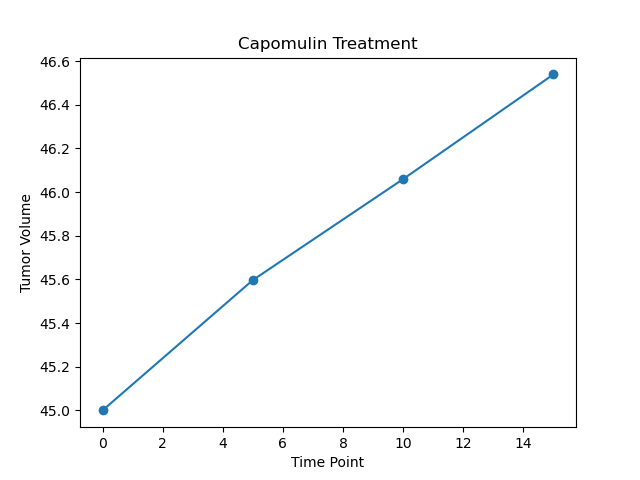

Text(0.5, 0, 'Time Point')

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = mouse_study[['Timepoint', 'Tumor Volume (mm3)']].loc[(mouse_study['Drug Regimen'] == 'Capomulin') 
                                                                    & (mouse_study['Mouse ID']=='r157')]
mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Time Point")

<IPython.core.display.Javascript object>


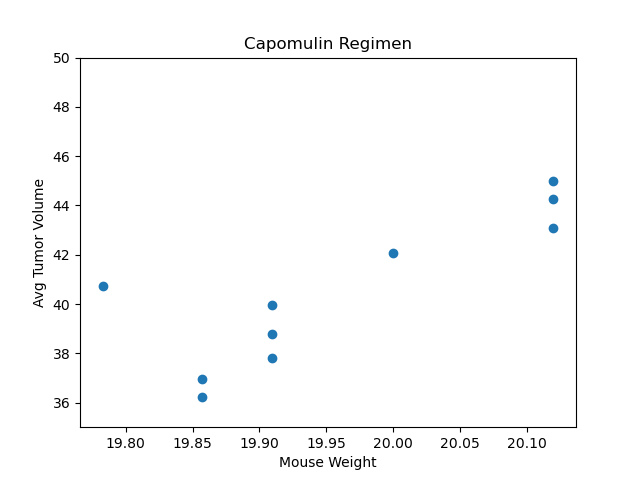

(35.0, 50.0)

In [148]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin'].groupby(mouse_study['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 
                                                                                                                  'Weight (g)':['mean']})
tumor_weight.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

tumor = tumor_weight['Average Tumor Volume {mm3}']
weight = tumor_weight['Average Mouse Weight (g)']
plt.scatter(weight,tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.title('Capomulin Regimen')
plt.ylim(35,50)

## Correlation and Regression

The correlation between the Tumor and Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


<IPython.core.display.Javascript object>


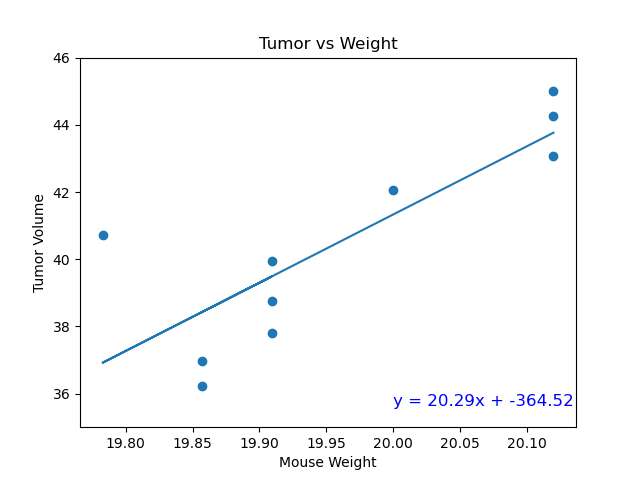

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumor,weight)
print(f'The correlation between the Tumor and Weight is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,tumor)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

tumor = tumor_weight['Average Tumor Volume {mm3}']
weight = tumor_weight['Average Mouse Weight (g)']
plt.scatter(weight,tumor)
plt.title('Tumor vs Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

values = weight * slope + intercept
plt.plot(weight, values)
plt.annotate(line_eq,(20,36),fontsize=12,color="blue", horizontalalignment='left', verticalalignment='top')
plt.show()